### Table of contents <a class='anchor' id='table'>

* [Read data](#read)
* [Basic model](#basic)
* [Models with controls](#control)
 * [Model 1](#model1)
 * [Model 2](#model2)
 * [Model 3](#model3)
* [Graphics](#graphics)
* [Interaction model](#interaction)
    * [Model 2.1](#model2.1)
    * [Model 2.2](#model2.2)
    * [Model 2.3](#model2.3)
* [Graphics 2](#graphics2)
* [Instrumental variables](#IV)
* [IRT model](#IRT)
 * [Model 3.1](#model3.1)
 * [Model 3.2](#model3.2)
 * [Model 3.3](#model3.3)
* [Graphics 3](#graphics3)

In [1]:
import pandas as pd
import numpy as np
from statsmodels.discrete.discrete_model import Logit
from statsmodels.regression.linear_model import OLS
from statsmodels.api import add_constant
# from plotnine import *
# from scipy.stats import chi2
# from scipy.stats import logistic 
# from sklearn.preprocessing import StandardScaler
# from statsmodels.tsa.tsatools import lagmat
# import statsmodels as sm
# from statsmodels.tools.tools import add_constant
# from statsmodels.iolib.summary2 import summary_col
# from stargazer.stargazer import Stargazer

In [3]:
def logistic_cdf(x):
    return 1/(1 + np.exp(-x))

## Read data <a class='anchor' id='read'>

In [2]:
rebel = pd.read_csv('data_vkr.csv')
rebel['total_governance'] = rebel['Education'] + rebel['Health'] +  rebel['Aid'] + rebel['Housing'] +  rebel['Law'] +  rebel['Infrastructure'] +  rebel['Transportation'] +  rebel['Justice'] +  rebel['Policing']
# rebel_cluster = rebel.dropna(axis=0, subset=['reb_intervention','total_governance'])

In [28]:
pd.pivot_table(rebel, values=['total_governance','reb_intervention'], index=['SideB'],
                    aggfunc={'total_governance': np.sum,
                             'reb_intervention': np.mean}).sort_values(by = ['total_governance','reb_intervention'],ascending = False)[0:50]

,reb_intervention,total_governance
SideB,,
Tibet,0.000000,393.0
KNU,0.000000,329.0
POLISARIO,0.025000,248.0
KIO (KIA),0.000000,201.0
PLO groups,0.020408,195.0
DPK,0.104478,193.0
PUK,0.184211,157.0
Hezbollah,0.387097,153.0
Hamas,0.300000,150.0


In [20]:
rebel.loc[rebel['SideB'] == 'KNU','reb_intervention'].mean()

0.0

In [23]:
rebel.loc[rebel['SideB'] == 'KIO (KIA)','reb_intervention'].mean()

0.0

## Basic model <a class='anchor' id='basic'>

* [Table of contents](#table)

In [46]:
model = Logit.from_formula('reb_intervention ~ total_governance + political_governance', 
                                                      data = rebel)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.171365
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       reb_intervention   No. Observations:                 4412
Model:                          Logit   Df Residuals:                     4410
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Nov 2022   Pseudo R-squ.:                0.003112
Time:                        17:25:11   Log-Likelihood:                -756.06
converged:                       True   LL-Null:                       -758.42
Covariance Type:            nonrobust   LLR p-value:                   0.02982
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2275      0.086    -37.319      0.000      -3.397      -3.058
Justice        0.4025      0.

In [10]:
X = rebel_cluster[['total_governance']]
X = add_constant(X)
X.rename(columns = {'const':'Intercept'}, inplace = True)
data_plot = X.copy()

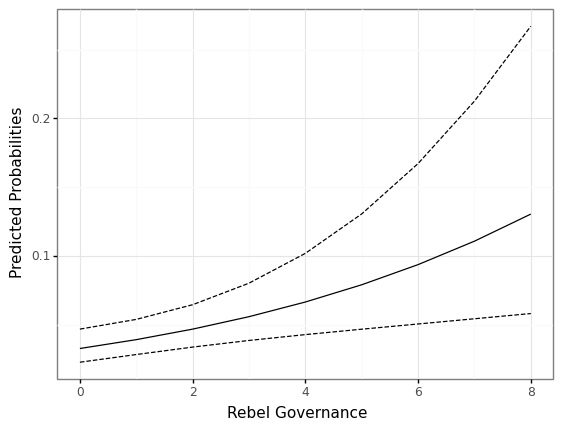

<ggplot: (126752479257)>


In [11]:
variance_covariance = results.cov_params()
data_indvars = data_plot
log_odds = np.dot(data_indvars, results.params)
standard_errors = np.dot(data_indvars, variance_covariance)
standard_errors = np.dot(standard_errors, np.transpose(data_indvars))
standard_errors = np.sqrt(np.diag(standard_errors))
data_plotting = pd.DataFrame({'Predicted Probabilities': logistic_cdf(log_odds),
                              'ub': logistic_cdf(log_odds + 1.96*standard_errors),
                              'lb': logistic_cdf(log_odds - 1.96*standard_errors),
                              'Rebel Governance': data_plot['total_governance']})
plot = (ggplot(data_plotting, aes(x = 'Rebel Governance'))+
        geom_line(aes(y = 'Predicted Probabilities'), linetype = 'solid', colour = 'black')+
        geom_line(aes(y = 'ub'), linetype = 'dashed', colour = 'black') +
        geom_line(aes(y = 'lb'), linetype = 'dashed', colour = 'black') +
        theme_bw()) 
print(plot)
# now we can observe a more intuitive illustration - because on y-axis we have probilities plotted

## Model with controls <a class='anchor' id='control'>

* [Table of contents](#table)

In [64]:
# rebel = pd.read_csv('data_vkr.csv')
rebel = rebel[rebel['thrdpar_code'] != 1]
rebel['gdppc'] = np.log(rebel['gdppc'] + 1)
rebel['Cold_war'] = 0
rebel.loc[rebel['Year'] <= 1990,'Cold_war'] = 1
rebel['lag'] = rebel['reb_intervention'].shift(1)
# rebel = rebel.merge(vdem,on = ['CCD','Year'])
rebel['polit_governance'] = rebel['Policing'] + rebel['Justice'] + rebel['NationalGov'] + rebel['LocalGov']
rebel_cluster = rebel.dropna(axis=0, subset=['reb_intervention','total_governance','gdppc','nmc','polit_governance','OrgGov'])

In [48]:
rebel.groupby('NationalGov')['total_governance'].mean()

NationalGov
0.0    0.448235
1.0    4.411862
Name: total_governance, dtype: float64

In [49]:
rebel.groupby('NationalGov')['reb_intervention'].mean()

NationalGov
0.0    0.040268
1.0    0.054795
Name: reb_intervention, dtype: float64

In [62]:
rebel['Outcome'].unique()

array([nan, 'Other', 'Victory', 'Frozen', 'Ceasefire_regulation',
       'Ceasefire', 'Peace'], dtype=object)

In [60]:
rebel.columns

Index(['old_id', 'Year', 'actorid', 'DyadID', 'VDemID', 'CCD', 'Count',
       'ConflictID', 'Ep', 'Location', 'SideA', 'SideB', 'ArmedConflict',
       'Existence', 'In_Power', 'Flag', 'OrgGov', 'Elect', 'Gov', 'Border',
       'ID', 'PoliticalParty', 'AttemptIO', 'JoinIO', 'Embassy', 'Media',
       'Constitution', 'Pol_Other', 'Currency', 'IllegalNet', 'NegResource',
       'Econ_Treaty', 'Taxation', 'Econ_Other', 'Education', 'Health',
       'Infrastructure', 'Transportation', 'Law', 'Policing', 'Justice',
       'Housing', 'ConstituencyPolitics', 'Aid', 'Soc_Other', 'ArmedForces',
       'Mil_Other', 'territorial', 'Incomp', 'Terr',
       'YEAR.First.Ep.Ended..final.', 'Years.of.Civil.War', 'Outcome',
       'VicSide', 'PeaceA', 'Gov_in_Exile', 'LocalGov', 'NationalGov',
       'PaperNatGov', 'Gov_Other', 'thrdpar_code', 'reb_intervention',
       'gov_intervetion', 'total_governance', 'rebstrength', 'ethnic_conflict',
       'nmc', 'oil', 'gov_intervention', 'gdppc', 'iso3c', '

In [57]:
rebel[(rebel['total_governance'] >= 3) & (rebel['reb_intervention'] == 1)]['SideB'].unique()

array(['Communist Party', 'CPB', 'NSCN - IM', 'PLO groups', 'Hamas',
       'Hezbollah', 'Al-Mahdi Army', 'DPK', 'PUK', 'Pathet Lao',
       'Republic of Nagorno-Karabakh', 'Republic of Abkhazia',
       'Republic of Biafra', 'NRA', 'Renamo', 'SNM', 'MPCI'], dtype=object)

In [55]:
rebel[(rebel['NationalGov'] == 1) & (rebel['reb_intervention'] == 1)]['SideB'].unique()

array(['Communist Party', 'ELAS', 'CPB', 'NSCN - IM', 'PLO groups',
       'Hamas', 'Fretilin', 'CPT', 'Al-Mahdi Army', 'DPK', 'PUK', 'FUNC',
       'LTTE-opposite', 'Republic of Nagorno-Karabakh',
       'Serbian Republic of Bosnia and Herzegovina',
       'Serbian Republic of Krajina', 'Republic of Abkhazia',
       'Republic of Biafra'], dtype=object)

In [51]:
rebel[(rebel['NationalGov'] == 1) & (rebel['reb_intervention'] == 0)]['SideB'].unique()

array(['Communist Party', 'Tibet', 'ELAS', 'KDPI', 'BDPS',
       'Republic of Chechnya (Ichkeria) ',
       'Forces of the Caucasus Emirate', 'KNU', 'CPB', 'KIO (KIA)', 'MTA',
       'PWG', 'CPI-M (communist)', 'NNC', 'NSCN - IM', 'NSCN - K ',
       'Sikh insurgents', 'ULFA', 'PLO groups', 'Hamas',
       'Republic of South Moluccas', 'Darul Islam ', 'Permesta', 'PRRI',
       'Fretilin', 'GAM', 'CPT', 'Patani insurgents', 'FNL',
       'Ansar al-Islam', 'ISI', 'DPK', 'PUK', 'FUNC', 'BRA',
       'LTTE-opposite', "Jam'iyyat-i Islami-yi Afghanistan",
       'Junbish-i Milli-yi Islami', 'Taleban', 'PKK/Kadek/KONGRA-GEL',
       'Republic of Croatia', 'UCK', 'Republic of Nagorno-Karabakh',
       'Croatian Republic of Bosnia and Herzegovina',
       'Republic of Abkhazia', 'PMR', 'Democratic Republic of Yemen',
       'Katanga', 'CNL', 'RCD - ML', 'EPLF', 'Anya Nya/SSLM', 'SPLM/A',
       'Republic of Biafra', 'SSDF', 'SNM', 'USC ', 'USC /SNA', 'NPFL',
       'POLISARIO'], dtype=object)

In [54]:
rebel[rebel['SideB'] == 'Darul Islam ']['reb_intervention']

1607    0
1608    0
1609    0
1610    0
1611    0
1612    0
1613    0
1614    0
1615    0
1616    0
1617    0
1618    0
1619    0
1620    0
1621    0
1622    0
1623    0
Name: reb_intervention, dtype: int64

### Model 1 <a class='anchor' id='model1'>

In [66]:
model1 = Logit.from_formula('reb_intervention ~ total_governance + nmc + gdppc + OrgGov', 
                                                      data = rebel_cluster)
results1 = model1.fit(method = 'lbfgs', maxiter = 1000,cov_type = 'cluster', cov_kwds = {'groups': rebel_cluster['SideB']})
print(results1.summary())

                           Logit Regression Results                           
Dep. Variable:       reb_intervention   No. Observations:                 3882
Model:                          Logit   Df Residuals:                     3877
Method:                           MLE   Df Model:                            4
Date:                Wed, 09 Nov 2022   Pseudo R-squ.:                 0.04289
Time:                        17:43:33   Log-Likelihood:                -641.29
converged:                       True   LL-Null:                       -670.03
Covariance Type:              cluster   LLR p-value:                 9.808e-12
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.1803      0.658     -4.834      0.000      -4.470      -1.891
total_governance     0.1548      0.073      2.117      0.034       0.011       0.298
nmc                -13.3218 

In [14]:
model1 = Logit.from_formula('gov_intervention ~ total_governance + polit_governance', 
                                                      data = rebel)
results1 = model1.fit()
print(results1.summary())

Optimization terminated successfully.
         Current function value: 0.297589
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       gov_intervention   No. Observations:                 3983
Model:                          Logit   Df Residuals:                     3980
Method:                           MLE   Df Model:                            2
Date:                Wed, 09 Nov 2022   Pseudo R-squ.:                0.001971
Time:                        17:16:52   Log-Likelihood:                -1185.3
converged:                       True   LL-Null:                       -1187.6
Covariance Type:            nonrobust   LLR p-value:                   0.09630
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.3156      0.062    -37.215      0.000      -2.438      -2.194
total_gover

### Model 2 <a class='anchor' id='model2'>

In [50]:
rebel_cluster = rebel.dropna(axis=0, subset=['reb_intervention','total_governance','gdppc','nmc','gov_intervention','ArmedConflict'])

In [51]:
model2 = Logit.from_formula('reb_intervention ~ total_governance  + gov_intervention + nmc', 
                                                      data = rebel_cluster)
results2 = model2.fit(method = 'lbfgs', maxiter = 1000,cov_type = 'cluster', cov_kwds = {'groups': rebel_cluster['SideB']})
print(results2.summary())

                           Logit Regression Results                           
Dep. Variable:       reb_intervention   No. Observations:                 3862
Model:                          Logit   Df Residuals:                     3858
Method:                           MLE   Df Model:                            3
Date:                Mon, 24 Oct 2022   Pseudo R-squ.:                 0.06565
Time:                        18:31:44   Log-Likelihood:                -636.92
converged:                       True   LL-Null:                       -681.67
Covariance Type:              cluster   LLR p-value:                 2.808e-19
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.5259      0.215    -16.371      0.000      -3.948      -3.104
total_governance     0.2139      0.063      3.400      0.001       0.091       0.337
gov_intervention     1.2885 

### Model 3 <a class='anchor' id='model3'>

In [52]:
rebel_cluster = rebel.dropna(axis=0, subset=['reb_intervention','lag','total_governance','gdppc','nmc','gov_intervention','ArmedConflict','territorial'])

In [53]:
model3 = Logit.from_formula('reb_intervention ~ total_governance +    gov_intervention + ArmedConflict + Years + gdppc + territorial + lag + Cold_war', 
                                                      data = rebel_cluster)
results = model3.fit(method = 'lbfgs', maxiter = 1000,cov_type = 'cluster', cov_kwds = {'groups': rebel_cluster['SideB']})
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:       reb_intervention   No. Observations:                 3862
Model:                          Logit   Df Residuals:                     3853
Method:                           MLE   Df Model:                            8
Date:                Mon, 24 Oct 2022   Pseudo R-squ.:                  0.3626
Time:                        18:31:47   Log-Likelihood:                -434.48
converged:                       True   LL-Null:                       -681.67
Covariance Type:              cluster   LLR p-value:                1.134e-101
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.8336      0.571     -8.466      0.000      -5.953      -3.715
total_governance     0.1485      0.050      2.964      0.003       0.050       0.247
gov_intervention     1.2218 

## Graphics <a class='anchor' id='graphics'>

* [Table of contents](#table)

In [18]:
X = rebel_cluster[['total_governance', 'nmc','gdppc','gov_intervention','ArmedConflict','Years','territorial']]
X = add_constant(X)
X.rename(columns = {'const':'Intercept'}, inplace = True)
data_plot = X.copy()
varlist_binary = ['gov_intervention','ArmedConflict','territorial']
varlist_continuous = ['gdppc','nmc','Years']
for x in varlist_binary:
    mean = np.mean(data_plot[x])
    if mean>0.5:
        data_plot[x] = 1
    else:
        data_plot[x] = 0
for x in varlist_continuous:
    data_plot[x] = np.mean(data_plot[x])

In [19]:
standard_errors = np.dot(data_indvars, variance_covariance)
standard_errors = np.dot(standard_errors, np.transpose(data_indvars))
standard_errors = np.sqrt(np.diag(standard_errors))

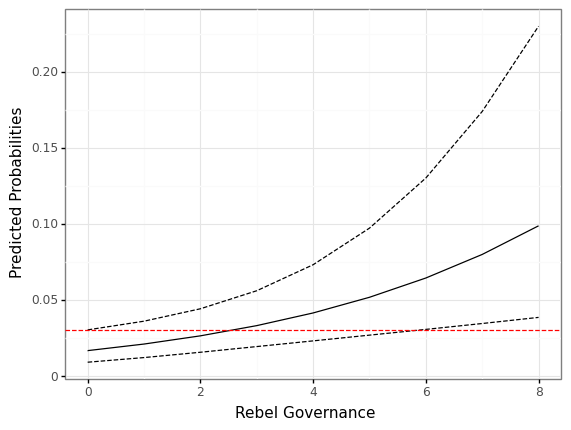

<ggplot: (126752524535)>


In [20]:
variance_covariance = results.cov_params()
data_indvars = data_plot
log_odds = np.dot(data_indvars, results.params)
standard_errors = np.dot(data_indvars, variance_covariance)
standard_errors = np.dot(standard_errors, np.transpose(data_indvars))
standard_errors = np.sqrt(np.diag(standard_errors))
ub = logistic_cdf(log_odds + 1.96*standard_errors)
lb = logistic_cdf(log_odds - 1.96*standard_errors)
data_plotting = pd.DataFrame({'Predicted Probabilities': logistic_cdf(log_odds),
                              'ub': ub,
                              'lb': lb,
                              'Rebel Governance': data_plot['total_governance']})
plot = (ggplot(data_plotting, aes(x = 'Rebel Governance'))+
        geom_line(aes(y = 'Predicted Probabilities'), linetype = 'solid', colour = 'black')+
        geom_line(aes(y = 'ub'), linetype = 'dashed', colour = 'black') +
        geom_line(aes(y = 'lb'), linetype = 'dashed', colour = 'black') +
        geom_hline(yintercept=ub.min(), color = "red", size=0.5, linetype = 'dashed') +
        theme_bw()) 
print(plot)

## Model with interaction <a class='anchor' id='interaction'>

* [Table of contents](#table)

In [22]:
rebel = pd.read_csv('data_vkr2.csv')
regan = pd.read_csv('regan.csv')
regan.drop(columns = ['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'], inplace = True)
new_data = pd.read_excel('additional.xlsx')
polity = pd.read_excel('polity_5.xls')
polity = polity[polity['polity'] > -10]
polity = polity[polity['year'] >= 1945]
polity = polity[['ccode','year','polity']]
polity.rename(columns = {'ccode':'thrdpar_code','year':'Year'},inplace = True)
for i in range(len(regan['thrdpar'])):
        if regan.loc[i,'target'] == 2:
            rebel.loc[(rebel['Year'] == regan.loc[i,'start_year']) & (rebel['CCD'] == regan.loc[i,'ccode']),'thrdpar_code'] =  regan.loc[i,'thrdpar']
            
for i in range(len(new_data['country'])):
    if regan.loc[i,'target'] == 2:
        rebel.loc[(rebel['Year'] == new_data.loc[i,'year']) & (rebel['CCD'] == new_data.loc[i,'ccode ']) & (rebel['SideB'] == new_data.loc[i,'SideB']),'thrdpar_code'] = new_data.loc[i,'ccode2']
        
rebel = rebel.merge(polity, on = ['Year','thrdpar_code'], how = 'left')
rebel['gdppc'] = np.log(rebel['gdppc'] + 1)

### Model 2.1 <a class='anchor' id='model2.1'>

In [23]:
model1 = Logit.from_formula('reb_intervention ~ total_governance + nmc + gdppc + polity + total_governance * polity', 
                                                      data = rebel)
results1 = model1.fit()
print(results1.summary())

Optimization terminated successfully.
         Current function value: 0.534960
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       reb_intervention   No. Observations:                  311
Model:                          Logit   Df Residuals:                      305
Method:                           MLE   Df Model:                            5
Date:                Fri, 03 Jun 2022   Pseudo R-squ.:                  0.1415
Time:                        16:27:43   Log-Likelihood:                -166.37
converged:                       True   LL-Null:                       -193.79
Covariance Type:            nonrobust   LLR p-value:                 1.407e-10
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.2164      0.587     -3.776      0.000      -3.367   

### Model 2.2 <a class='anchor' id='model2.2'>

In [24]:
model2 = Logit.from_formula('reb_intervention ~ total_governance  +  nmc + gdppc  + polity + total_governance * polity  + ArmedConflict', 
                                                      data = rebel)
results2 = model2.fit()
print(results2.summary())

Optimization terminated successfully.
         Current function value: 0.532609
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       reb_intervention   No. Observations:                  311
Model:                          Logit   Df Residuals:                      304
Method:                           MLE   Df Model:                            6
Date:                Fri, 03 Jun 2022   Pseudo R-squ.:                  0.1453
Time:                        16:27:46   Log-Likelihood:                -165.64
converged:                       True   LL-Null:                       -193.79
Covariance Type:            nonrobust   LLR p-value:                 2.526e-10
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.4296      0.621     -3.911      0.000      -3.647   

### Model 2.3 <a class='anchor' id='model2.3'>

In [25]:
model3 = Logit.from_formula('reb_intervention ~ total_governance  + nmc + gdppc + polity + total_governance * polity + ArmedConflict + Years + territorial', 
                                                      data = rebel)

results = model3.fit(method = 'lbfgs', maxiter = 10000)
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:       reb_intervention   No. Observations:                  311
Model:                          Logit   Df Residuals:                      302
Method:                           MLE   Df Model:                            8
Date:                Fri, 03 Jun 2022   Pseudo R-squ.:                  0.1483
Time:                        16:27:49   Log-Likelihood:                -165.06
converged:                       True   LL-Null:                       -193.79
Covariance Type:            nonrobust   LLR p-value:                 1.458e-09
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.3624      0.617     -3.827      0.000      -3.572      -1.153
total_governance            0.3727      0.097      3.845      0.000       0.183       0.563


## Graphics 2 <a class='anchor' id='graphics2'>

* [Table of contents](#table)

In [26]:
rebel = rebel.dropna(subset=['total_governance','nmc','gdppc','polity','ArmedConflict','Years','territorial'])

In [27]:
rebel['interaction'] = rebel['polity']*rebel['total_governance']

<ipython-input-27-f92b06e74b7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [28]:
data_indvars = pd.DataFrame()
rebel = rebel.reset_index()
data_indvars['Intercept'] = [1] * len(rebel)
data_indvars = pd.concat([data_indvars,rebel[['total_governance','nmc','gdppc','polity','interaction','ArmedConflict','Years','territorial']]], axis =1)

In [29]:
data_indvars_2 = data_indvars.copy()
data_indvars['total_governance'] = 1
data_indvars['interaction'] = data_indvars['polity']
data_indvars[['nmc','Intercept','gdppc','polity','ArmedConflict','Years','territorial']] = 0

In [30]:
variance_covariance = results.cov_params()

In [31]:
varlist_binary = ['ArmedConflict','territorial']
varlist_continuous = ['total_governance','nmc','gdppc','Years']
for x in varlist_binary:
    mean = np.mean(data_indvars_2[x])
    if mean>0.5:
        data_indvars_2[x] = 1
    else:
        data_indvars_2[x] = 0
for x in varlist_continuous:
    data_indvars_2[x] = np.mean(data_indvars_2[x])

data_indvars_2['interaction'] = data_indvars_2['polity'] * data_indvars_2['total_governance']

In [32]:
data_indvars.drop_duplicates(subset = 'interaction', inplace = True)
data_indvars_2.drop_duplicates(subset = 'interaction', inplace = True)

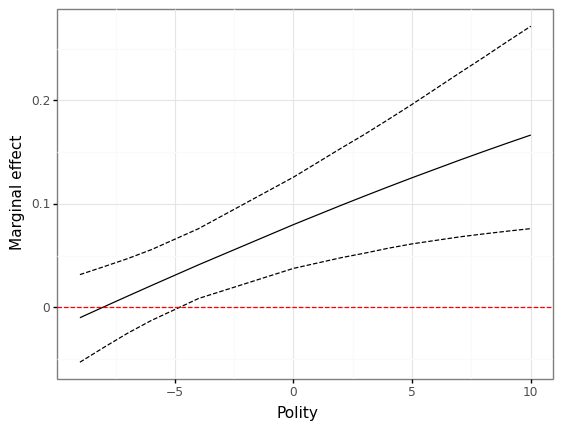

<ggplot: (126762081052)>


In [33]:
sample_normal = np.random.multivariate_normal(results.params, variance_covariance, size = 10000)
# we sample 100000 observation with mean as our parameters and variance_covariance matrix 
# compute the matrix
# заменить на logitstic pdf из пакета scipy (total governance = 1)
matrix_values = logistic.pdf(np.dot(data_indvars_2, np.transpose(sample_normal)))
matrix_values_2 = np.dot(data_indvars, np.transpose(sample_normal))
matrix_values = matrix_values * matrix_values_2
#второй компонент data_indvars logistic cdf, в котором все переменные установлены на 0, total governance на 1 
#далее два вектора умножаются поэлементно (a * b)
#calculate means, 2.5 and 97.5 percentiles
means = np.mean(matrix_values, axis = 1)
lb = np.percentile(matrix_values, q = 2.5, axis = 1)
ub = np.percentile(matrix_values, q = 97.5, axis = 1)
#plot
data_plotting = pd.DataFrame({'Marginal effect': means,
                              'ub': ub,
                              'lb': lb,
                              'Polity': data_indvars['interaction']})
plot = (ggplot(data_plotting, aes(x = 'Polity'))+
        geom_line(aes(y = 'Marginal effect'), linetype = 'solid', colour = 'black')+
        geom_line(aes(y = 'ub'), linetype = 'dashed', colour = 'black') +
        geom_line(aes(y = 'lb'), linetype = 'dashed', colour = 'black') +
        geom_hline(yintercept=0, color = "red", size=0.5, linetype = 'dashed') +
        theme_bw()) 
print(plot)

## Instrumental Variables <a class='anchor' id='IV'>

* [Table of contents](#table)

In [2]:
rebel = pd.read_csv('data_vkr.csv')
rebel['gdppc'] = np.log(rebel['gdppc'] + 1)
felat = pd.read_csv('fel.csv')
felat = felat[felat['year'] == 1945]
felat = felat[['lmtnest','ccode']]
felat.rename(columns = {'ccode':'CCD'}, inplace = True)

rebel = rebel.merge(felat, on = 'CCD', how = 'left')

In [40]:
codes = pd.read_excel('all_codes.xlsx')

In [44]:
codes = codes[['Alpha3_Code','COW_Country_Code']]
codes.rename(columns = {'COW_Country_Code':'CCD'}, inplace = True)

In [23]:
instruments = pd.read_excel('instruments.xlsx')
# codes = pd.read_excel('all_codes.xlsx')

In [45]:
rain = pd.read_excel('rainfall.xlsx')

In [46]:
rain.rename(columns = {'Time':'Year','Average precipitation in depth (mm per year) [AG.LND.PRCP.MM]':'rainfall', 'Country Code':'Alpha3_Code'}, inplace = True)

In [47]:
for i in [1960,1961,1963,1964,1965,1966]:
    rain.loc[rain['Year'] == i,'rainfall'] = rain.loc[rain['Year'] == 1962,'rainfall'].values
for i in range(1968,1972):
    rain.loc[rain['Year'] == i,'rainfall'] = rain.loc[rain['Year'] == 1967,'rainfall'].values
for i in range(1973,1977):
    rain.loc[rain['Year'] == i,'rainfall'] = rain.loc[rain['Year'] == 1972,'rainfall'].values
for i in range(1978,1982):
    rain.loc[rain['Year'] == i,'rainfall'] = rain.loc[rain['Year'] == 1977,'rainfall'].values
for i in range(1983,1987):
    rain.loc[rain['Year'] == i,'rainfall'] = rain.loc[rain['Year'] == 1982,'rainfall'].values
for i in range(1988,1992): 
    rain.loc[rain['Year'] == i,'rainfall'] = rain.loc[rain['Year'] == 1987,'rainfall'].values
for i in range(1993,1997):
    rain.loc[rain['Year'] == i,'rainfall'] = rain.loc[rain['Year'] == 1992,'rainfall'].values
for i in range(1998,2002):
    rain.loc[rain['Year'] == i,'rainfall'] = rain.loc[rain['Year'] == 1997,'rainfall'].values
for i in range(2003,2007):
    rain.loc[rain['Year'] == i,'rainfall'] = rain.loc[rain['Year'] == 2002,'rainfall'].values
for i in range(2008,2012):
    rain.loc[rain['Year'] == i,'rainfall'] = rain.loc[rain['Year'] == 2007,'rainfall'].values
for i in range(2013,2017):
    rain.loc[rain['Year'] == i,'rainfall'] = rain.loc[rain['Year'] == 2012,'rainfall'].values

In [49]:
rain = rain[['Year','Alpha3_Code','rainfall']]

In [51]:
rain = rain.merge(codes, on = 'Alpha3_Code')

In [52]:
iv = pd.read_csv('iv.csv')

In [56]:
iv = iv.merge(rain, on = ['Year','CCD'])

In [57]:
iv.to_csv('iv.csv', index = False)

In [16]:
rain.to_excel('rainy.xlsx', index = False)

In [27]:
rebel = rebel.merge(instruments, on = ['CCD','Year'])

In [34]:
def ivregress(DV, endogenous_variable, instrument, exog, data):
    data['Intercept'] = 1
    data_estimation_1 = data[['Intercept'] + [instrument] + exog]
    model_1 = OLS(endog = data[endogenous_variable], exog = data_estimation_1, missing = "drop")
    results_1 = model_1.fit()
    #obtain predictions
    data[endogenous_variable + "iv"] = np.dot(data_estimation_1, results_1.params)
    #create estimation dataset for the second stage
    data_estimation_2 = data[['Intercept'] + [endogenous_variable + "iv"] + exog]
    # заменить на linear probability model 
    model_2 = OLS(endog = data[DV], exog = data_estimation_2, missing = "drop")
    results_2 = model_2.fit()
    return (results_2, results_1)

In [60]:
rebel.to_csv('IV.csv', index = False)

In [42]:
data_estimation = rebel.copy()
results = ivregress('reb_intervention', 'total_governance', 'pop_density', 
                ['nmc','gdppc','gov_intervention','ArmedConflict','Years','territorial'], data_estimation)
print(results[0].summary())

                            OLS Regression Results                            
Dep. Variable:       reb_intervention   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     18.66
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           1.27e-24
Time:                        12:45:50   Log-Likelihood:                 600.24
No. Observations:                3834   AIC:                            -1184.
Df Residuals:                    3826   BIC:                            -1134.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0028      0

In [43]:
print(results[1].summary())

                            OLS Regression Results                            
Dep. Variable:       total_governance   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     98.92
Date:                Fri, 28 Oct 2022   Prob (F-statistic):          7.68e-132
Time:                        12:45:54   Log-Likelihood:                -7059.5
No. Observations:                3377   AIC:                         1.414e+04
Df Residuals:                    3369   BIC:                         1.418e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5633      0.181  

In [37]:
print(results[0].summary())

                            OLS Regression Results                            
Dep. Variable:       reb_intervention   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     18.40
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           3.01e-24
Time:                        12:44:16   Log-Likelihood:                 599.35
No. Observations:                3834   AIC:                            -1183.
Df Residuals:                    3826   BIC:                            -1133.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0027      0

In [41]:
rebel['pop_density'] = np.log(rebel['pop_density'])

In [1]:
import linearmodels.iv.model as lm

In [49]:
rebel = rebel[['nmc','gdppc','gov_intervention','ArmedConflict','Years','territorial','reb_intervention', 'total_governance', 'lmtnest',]]

In [ ]:
def ivregress(DV, endogenous_variable, instrument, exog, data):
    data['Intercept'] = 1
    data_estimation_1 = data[['Intercept'] + [instrument] + exog]
    model_1 = OLS(endog = data[endogenous_variable], exog = data_estimation_1, missing = "drop")
    results_1 = model_1.fit()
    #obtain predictions
    data[endogenous_variable + "iv"] = np.dot(data_estimation_1, results_1.params)
    #create estimation dataset for the second stage
    data_estimation_2 = data[['Intercept'] + [endogenous_variable + "iv"] + exog]
    # заменить на linear probability model 
    model_2 = OLS(endog = data[DV], exog = data_estimation_2, missing = "drop")
    results_2 = model_2.fit()
    return (results_2, results_1)

In [ ]:
data_estimation = rebel.copy()
results = ivregress('reb_intervention', 'total_governance', 'lmtnest', 
                ['nmc','gdppc','gov_intervention','ArmedConflict','Years','territorial'], data_estimation)
print(results[0].summary())

In [54]:
# rebel = add_constant(rebel)
model_iv_lm = lm.IV2SLS(dependent=rebel["reb_intervention"], exog=rebel[['nmc','gdppc','gov_intervention','ArmedConflict','Years','territorial']], endog=rebel["total_governance"], instruments=rebel[["lmtnest"]]).fit(cov_type="homoskedastic", debiased=True)

C:\Users\Acer\anaconda3\lib\site-packages\linearmodels\shared\exceptions.py:35: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.


In [55]:
print(model_iv_lm.sargan)

Invalid test statistic
Test requires more instruments than endogenous variables.
Sargan's test of overidentification


## IRT model <a class='anchor' id='IRT'>

* [Table of contents](#table)

In [42]:
rebel = pd.read_csv('data_vkr.csv')
latent = pd.read_csv('rebel_latent.csv')
latent = latent.reset_index()
latent.drop(columns = ['index'], inplace = True)
rebel.dropna(axis=0, subset=['Education','Health','Aid','Housing','Law','Infrastructure','Transportation','Justice','Policing'], inplace = True)
rebel = rebel.reset_index()
rebel = rebel.join(latent)
rebel.rename(columns = {'obs,"xim"':'rebel_latent'}, inplace = True)
rebel['gdppc'] = np.log(rebel['gdppc'] + 1)

In [43]:
rebel['total_governance'] = rebel['rebel_latent']

### Model 3.1 <a class='anchor' id='model3.1'>

In [44]:
rebel_cluster = rebel.dropna(axis=0, subset=['reb_intervention','gdppc','nmc'])
model1 = Logit.from_formula('reb_intervention ~ total_governance + nmc + gdppc', 
                                                      data = rebel_cluster)
results1 = model1.fit(method = 'lbfgs', maxiter = 1000,cov_type = 'cluster', cov_kwds = {'groups': rebel_cluster['SideB']})
print(results1.summary())

                           Logit Regression Results                           
Dep. Variable:       reb_intervention   No. Observations:                 3951
Model:                          Logit   Df Residuals:                     3947
Method:                           MLE   Df Model:                            3
Date:                Fri, 03 Jun 2022   Pseudo R-squ.:                 0.04689
Time:                        16:28:22   Log-Likelihood:                -665.26
converged:                       True   LL-Null:                       -697.99
Covariance Type:              cluster   LLR p-value:                 3.991e-14
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.8155      0.966     -3.949      0.000      -5.709      -1.922
total_governance     1.1144      0.367      3.036      0.002       0.395       1.834
nmc                -15.5583 

### Model 3.2 <a class='anchor' id='model3.2'>

In [45]:
rebel_cluster = rebel.dropna(axis=0, subset=['reb_intervention','gdppc','nmc','gov_intervention','ArmedConflict'])


model2 = Logit.from_formula('reb_intervention ~ total_governance   +  nmc + gdppc  + gov_intervention + ArmedConflict', 
                                                      data = rebel_cluster)
results2 = model2.fit(method = 'lbfgs', maxiter = 1000,cov_type = 'cluster', cov_kwds = {'groups': rebel_cluster['SideB']})
print(results2.summary())

                           Logit Regression Results                           
Dep. Variable:       reb_intervention   No. Observations:                 3862
Model:                          Logit   Df Residuals:                     3856
Method:                           MLE   Df Model:                            5
Date:                Fri, 03 Jun 2022   Pseudo R-squ.:                 0.09088
Time:                        16:28:24   Log-Likelihood:                -619.72
converged:                       True   LL-Null:                       -681.67
Covariance Type:              cluster   LLR p-value:                 4.692e-25
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.8767      1.268     -3.847      0.000      -7.361      -2.392
total_governance     1.0834      0.391      2.769      0.006       0.317       1.850
nmc                -10.1546 

### Model 3.3 <a class='anchor' id='model3.3'>

In [46]:
rebel_cluster = rebel.dropna(axis=0, subset=['reb_intervention','gdppc','nmc','gov_intervention','ArmedConflict','territorial'])

model3 = Logit.from_formula('reb_intervention ~ total_governance +  gdppc + nmc + gov_intervention + ArmedConflict + Years + territorial', 
                                                      data = rebel_cluster)
results3 = model3.fit(method = 'lbfgs', maxiter = 1000,cov_type = 'cluster', cov_kwds = {'groups': rebel_cluster['SideB']})
print(results3.summary())

                           Logit Regression Results                           
Dep. Variable:       reb_intervention   No. Observations:                 3862
Model:                          Logit   Df Residuals:                     3854
Method:                           MLE   Df Model:                            7
Date:                Fri, 03 Jun 2022   Pseudo R-squ.:                  0.1014
Time:                        16:28:25   Log-Likelihood:                -612.52
converged:                       True   LL-Null:                       -681.67
Covariance Type:              cluster   LLR p-value:                 1.159e-26
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.7774      1.167     -4.092      0.000      -7.065      -2.489
total_governance     1.1719      0.436      2.688      0.007       0.317       2.026
gdppc                0.1463 

## Graphics 3 <a class='anchor' id='graphics3'>

* [Table of contents](#table)

In [4]:
X = rebel_cluster[['rebel_latent', 'gdppc','nmc', 'gov_intervention','ArmedConflict','Years','territorial','NationalGov']]
X = add_constant(X)
X.rename(columns = {'const':'Intercept'}, inplace = True)
data_plot = X.copy()
varlist_binary = ['gov_intervention','ArmedConflict','territorial','NationalGov']
varlist_continuous = ['gdppc','nmc','Years']
for x in varlist_binary:
    mean = np.mean(data_plot[x])
    if mean>0.5:
        data_plot[x] = 1
    else:
        data_plot[x] = 0
for x in varlist_continuous:
    data_plot[x] = np.mean(data_plot[x])

In [5]:
variance_covariance = results.cov_params()
data_indvars = data_plot
log_odds = np.dot(data_indvars, results.params)
standard_errors = np.dot(data_indvars, variance_covariance)
standard_errors = np.dot(standard_errors, np.transpose(data_indvars))
standard_errors = np.sqrt(np.diag(standard_errors))

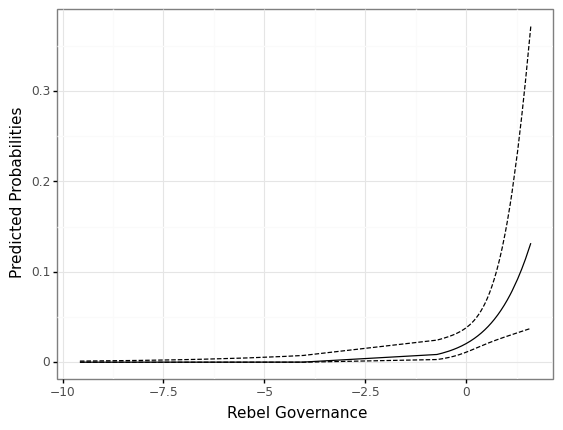

<ggplot: (97340579190)>


In [105]:
data_plotting = pd.DataFrame({'Predicted Probabilities': logistic_cdf(log_odds),
                              'ub': logistic_cdf(log_odds + 1.96*standard_errors),
                              'lb': logistic_cdf(log_odds - 1.96*standard_errors),
                              'Rebel Governance': data_plot['rebel_latent']})
plot = (ggplot(data_plotting, aes(x = 'Rebel Governance'))+
        geom_line(aes(y = 'Predicted Probabilities'), linetype = 'solid', colour = 'black')+
        geom_line(aes(y = 'ub'), linetype = 'dashed', colour = 'black') +
        geom_line(aes(y = 'lb'), linetype = 'dashed', colour = 'black') +
        theme_bw()) 
print(plot)